In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
pre_df = pd.read_csv('./data/dataset.csv').drop('Unnamed: 0', axis=1)
pre_df.shape

(965, 34)

In [91]:
pre_df.columns

Index(['School', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'W.1', 'L.1', 'W.2',
       'L.2', 'W.3', 'L.3', 'Tm.', 'Opp.', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'Year', 'Round'],
      dtype='object')

In [92]:
df = pre_df.drop(['School', 'Round'], axis=1)

In [93]:
df = (df - df.mean())/df.std()

PC-1     4.201487e-01
PC-2     1.260761e-01
PC-3     8.199663e-02
PC-4     5.942936e-02
PC-5     5.736314e-02
PC-6     4.518464e-02
PC-7     3.436850e-02
PC-8     2.484777e-02
PC-9     2.168289e-02
PC-10    1.906697e-02
PC-11    1.806060e-02
PC-12    1.531606e-02
PC-13    1.347355e-02
PC-14    1.300633e-02
PC-15    9.236460e-03
PC-16    7.879737e-03
PC-17    6.393473e-03
PC-18    5.843542e-03
PC-19    5.363957e-03
PC-20    4.097878e-03
PC-21    3.250269e-03
PC-22    2.872004e-03
PC-23    2.125580e-03
PC-24    1.355872e-03
PC-25    1.165833e-03
PC-26    1.747940e-04
PC-27    9.637161e-05
PC-28    6.344508e-05
PC-29    3.626215e-05
PC-30    2.272074e-05
PC-31    5.224730e-07
PC-32    1.971580e-33
dtype: float64


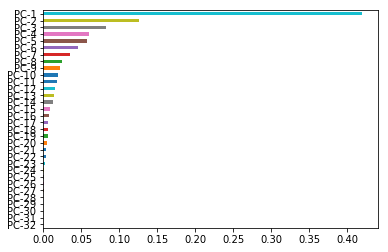

In [94]:
n_components = df.shape[1]
col = ['PC-'+str(i+1) for i in range(n_components)]
pca = PCA(n_components = n_components)
pca.fit(df)
PVE = pd.Series(pca.explained_variance_ratio_, index=col)
print(PVE)
PVE.sort_values().plot.barh()

In [95]:
df_loadings = pd.DataFrame(pca.components_, columns=df.columns, index=col)
print(df_loadings.shape)
df_loadings.round(2)

(32, 32)


,G,W,L,W-L%,SRS,SOS,W.1,L.1,W.2,L.2,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Year
PC-1,-0.22,-0.26,0.22,-0.24,-0.21,-0.12,-0.19,0.18,-0.20,0.18,...,-0.18,-0.05,-0.16,-0.22,-0.21,-0.15,-0.14,-0.05,-0.12,-0.03
PC-2,-0.15,0.13,-0.27,0.22,0.02,-0.12,0.26,-0.30,0.08,-0.24,...,-0.16,0.08,-0.21,-0.19,-0.04,-0.06,-0.14,-0.19,-0.22,-0.12
PC-3,0.10,-0.01,0.08,-0.05,0.04,0.09,-0.06,0.11,0.01,0.06,...,-0.19,0.30,-0.26,-0.14,0.06,-0.12,-0.17,-0.34,-0.07,0.30
PC-4,0.03,-0.02,0.04,-0.04,-0.40,-0.54,0.22,-0.20,-0.24,-0.02,...,0.07,-0.08,-0.01,-0.02,-0.04,0.15,-0.18,0.16,0.22,0.05
PC-5,0.14,0.09,-0.03,0.06,-0.04,-0.07,0.17,-0.08,0.10,-0.02,...,0.04,-0.17,0.09,0.08,-0.19,-0.03,0.13,-0.25,-0.11,0.49
PC-6,-0.01,-0.02,0.02,-0.02,-0.09,-0.09,0.02,-0.01,-0.04,-0.01,...,0.34,0.40,-0.17,-0.03,-0.09,-0.29,-0.10,0.04,0.09,0.20
PC-7,0.05,-0.03,0.07,-0.06,-0.14,-0.19,0.01,-0.02,-0.04,0.06,...,-0.21,-0.29,-0.07,0.08,0.29,-0.15,0.19,0.20,-0.30,0.17
PC-8,-0.04,-0.02,0.00,-0.02,0.04,0.08,0.02,-0.01,-0.44,0.48,...,0.01,0.08,0.18,0.17,0.01,-0.30,0.05,-0.21,-0.21,-0.09
PC-9,-0.03,-0.02,0.01,-0.02,0.07,0.07,-0.01,0.04,-0.19,0.22,...,-0.18,0.33,-0.06,-0.24,0.16,0.64,-0.10,0.12,0.10,0.02
PC-10,0.02,-0.00,0.01,-0.01,-0.11,-0.15,0.04,0.01,0.07,-0.22,...,-0.12,0.28,0.20,0.06,0.12,0.06,-0.32,-0.34,-0.33,-0.06


In [96]:
df_scores = pd.DataFrame(pca.transform(df), columns=col)
df_scores.shape

(965, 32)

In [101]:
output_table = df_scores.drop(df_scores.columns[20:], axis=1)
output_table['Year'] = pre_df['Year']
output_table['Round'] = pre_df['Round']
output_table['School'] = pre_df['School']

In [102]:
output_table.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,Year,Round,School
0,6.076648,-1.976649,-2.848498,1.619673,-1.499366,-0.361836,1.019153,1.434457,0.714081,0.811379,...,0.688366,-0.304890,-0.281731,-0.205803,-0.140139,0.340214,-0.099955,0,6,Appalachian State
1,-5.397574,-1.225701,-2.640536,-0.686919,-2.231943,1.268349,-0.970858,0.854973,0.483640,0.945111,...,0.661443,0.159350,0.994632,0.590591,0.674845,0.279921,-0.757373,0,5,Arizona
2,-0.459077,-0.226509,-0.177002,-0.025225,-2.348304,-2.840060,-1.581769,-1.759809,0.738214,0.328368,...,-0.694507,-0.067370,-0.248602,0.238970,-0.456775,0.480758,-0.203236,0,6,Arkansas
3,0.737941,-2.735202,-1.689384,-1.009387,-1.348711,-2.272617,-0.260527,0.004799,-0.184886,1.096526,...,0.271134,0.544804,-0.797072,-0.432104,-0.827898,0.256052,-0.232796,0,5,Auburn
4,3.519914,2.074051,-0.954414,-0.144123,-1.547389,-1.325878,1.202000,2.277089,-1.031561,-0.126343,...,-1.376886,-1.040308,0.260123,-0.111515,-0.763786,0.158143,0.004584,0,6,Ball State


In [103]:
output_table.to_csv('./data/PCA_Output.csv')

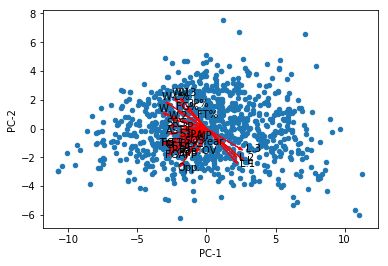

In [104]:
df_scores.plot.scatter(x='PC-1', y='PC-2')
x_scale = df_scores['PC-1'].abs().max()
y_scale = df_scores['PC-2'].abs().max()

for i in range(df.shape[1]):
    x = x_scale*df_loadings.iloc[0,i]
    y = y_scale*df_loadings.iloc[1,i]
    plt.arrow(0, 0, x, y, head_width=.2, color='red')
    x = 1.2*x
    y = 1.2*y
    plt.text(x,y,df.columns[i], color='black')
